In [1]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv('Titanic_train.csv')

# Display the first few rows of the dataset to understand its structure
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Handling missing values in 'Age' by filling with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Handling 'Embarked' missing values by filling with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Dropping 'Cabin' column due to high number of missing values
train_df.drop('Cabin', axis=1, inplace=True)


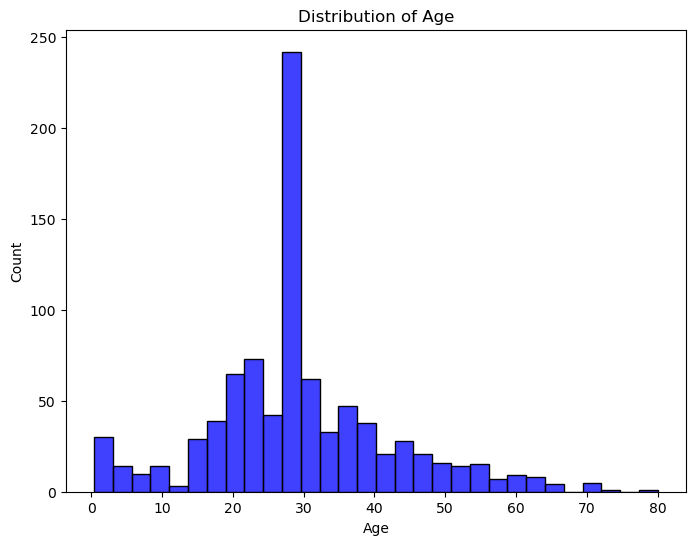

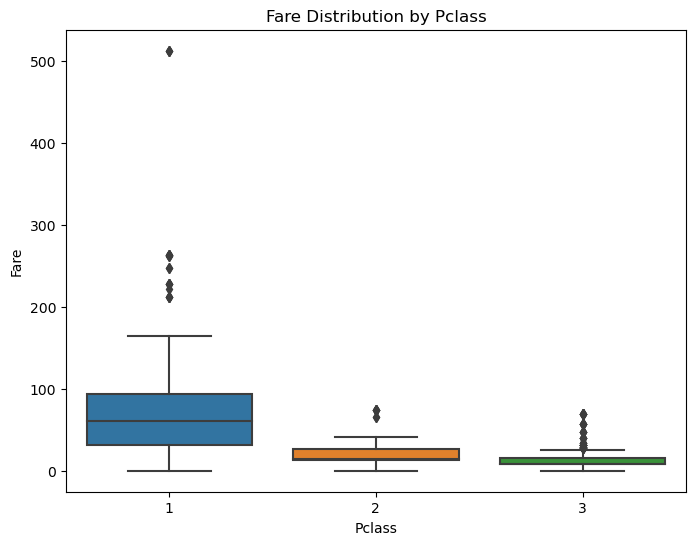

C:\Users\Reshma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


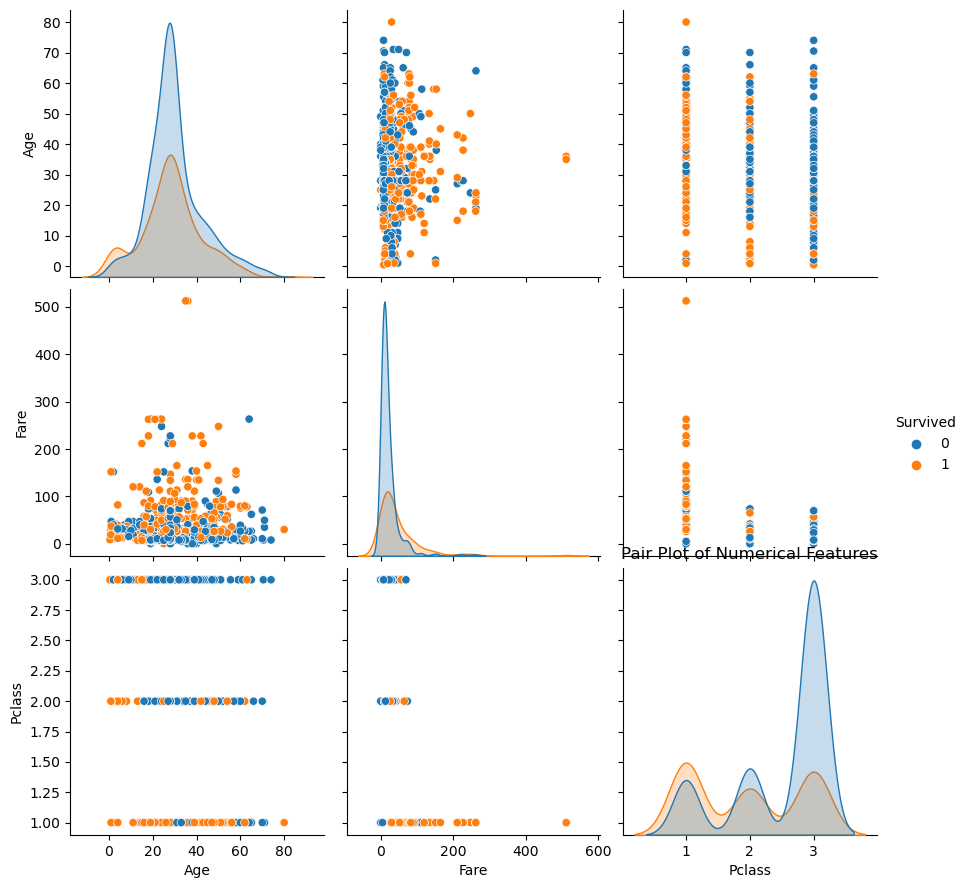

C:\Users\Reshma\AppData\Local\Temp\ipykernel_2348\2168961151.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


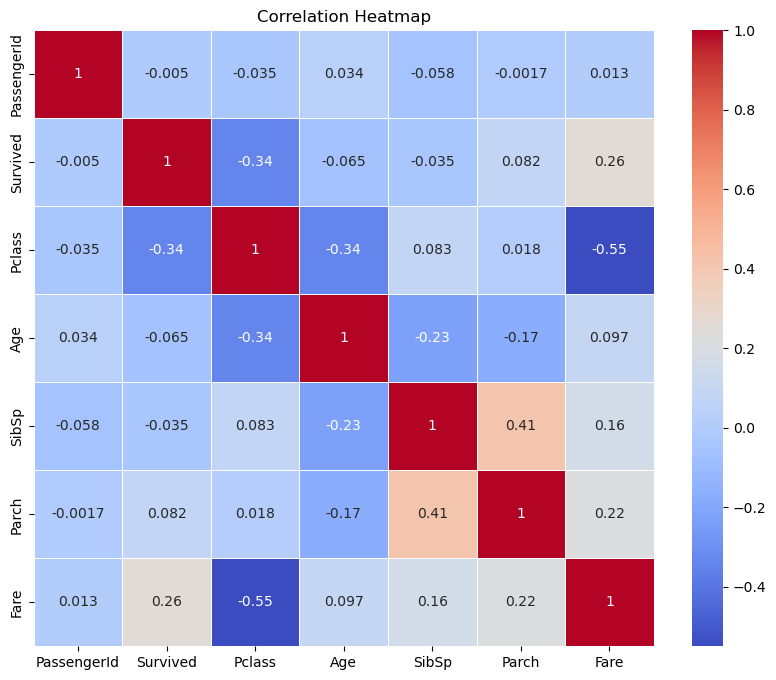

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Example: Box plot of Fare by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Example: Pair plot of numerical features
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', height=3)
plt.title('Pair Plot of Numerical Features')
plt.show()

# Example: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [9]:
import numpy as np

# Calculate the IQR for 'Fare'
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
# Identify outliers
outliers = train_df[(train_df['Fare'] < lower_bound) | (train_df['Fare'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 116


In [12]:
# Example of handling outliers: Winsorization
train_df['Fare'] = np.where(train_df['Fare'] > upper_bound, upper_bound, train_df['Fare'])

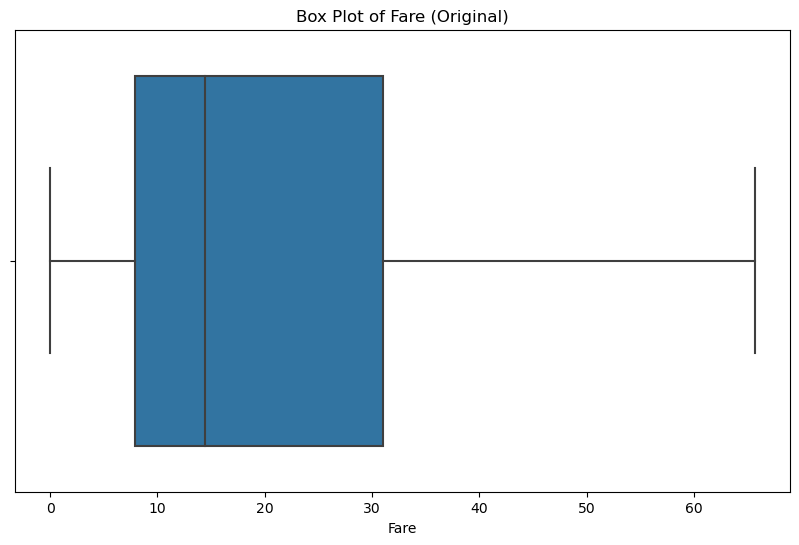

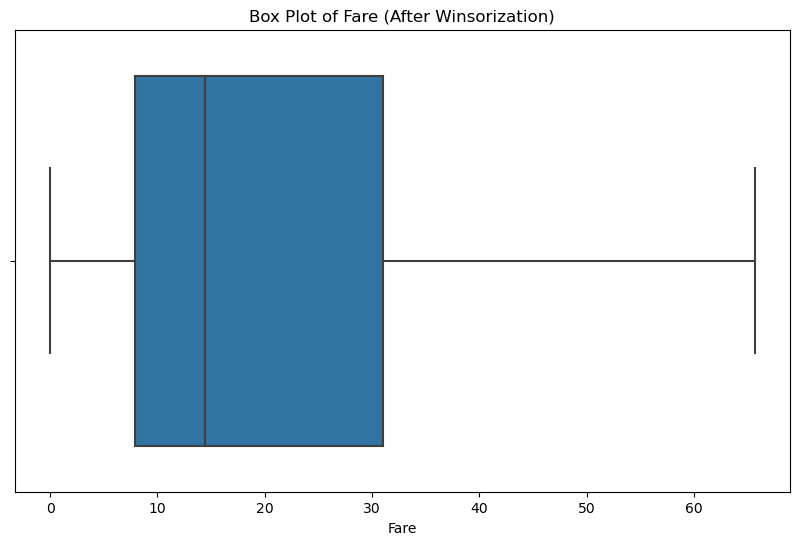

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Box Plot of Fare (Original)')
plt.xlabel('Fare')
plt.show()

# Box plot after winsorization
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Box Plot of Fare (After Winsorization)')
plt.xlabel('Fare')
plt.show()


In [14]:
import numpy as np

# Calculate IQR after winsorization
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers after winsorization
outliers_after = train_df[(train_df['Fare'] < lower_bound) | (train_df['Fare'] > upper_bound)]
print("Number of outliers after handling:", len(outliers_after))


Number of outliers after handling: 0


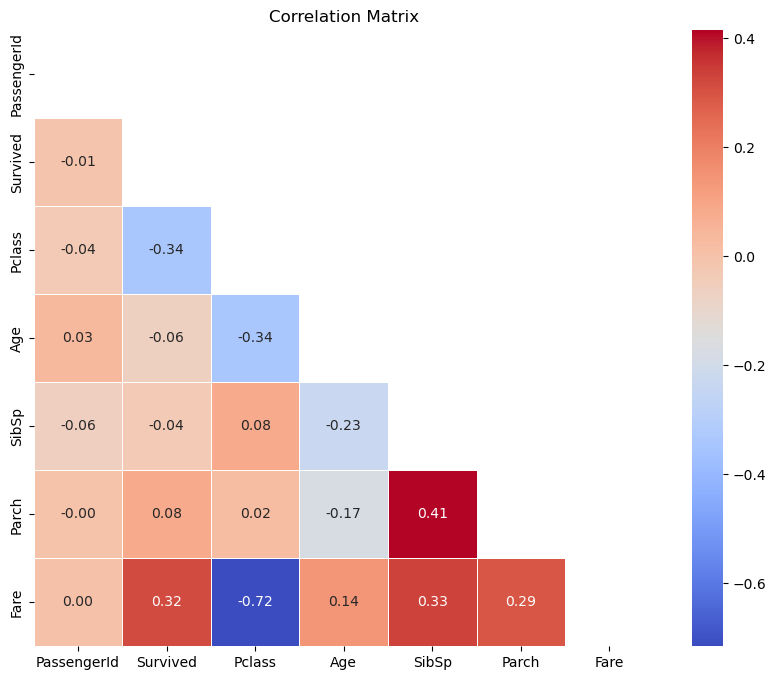

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numeric columns only
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_df[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Create a new feature combining Pclass and Fare
train_df['ClassFare'] = train_df['Pclass'] * train_df['Fare']

# Drop the original Pclass and Fare columns
train_df.drop(['Pclass', 'Fare'], axis=1, inplace=True)

In [17]:
# Create a new feature FamilySize
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

# Drop the original SibSp and Parch columns
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [18]:
# Display the updated dataframe to review changes
train_df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Embarked,ClassFare,FamilySize
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,S,21.7500,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C,65.6344,1
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,S,23.7750,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,S,53.1000,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,S,24.1500,0


In [19]:
train_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Embarked',
       'ClassFare', 'FamilySize'],
      dtype='object')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Embarked     891 non-null    object 
 7   ClassFare    891 non-null    float64
 8   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [21]:
train_df.describe()

,PassengerId,Survived,Age,ClassFare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,43.280355,0.904602
std,257.353842,0.486592,13.019697,29.725678,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,23.687400,0.000000
50%,446.000000,0.000000,28.000000,28.500000,0.000000
75%,668.500000,1.000000,35.000000,58.000000,1.000000
max,891.000000,1.000000,80.000000,196.903200,10.000000


In [22]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


In [23]:
# Handle missing values in 'Age' by imputing with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Handle missing values in 'Embarked' by imputing with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [24]:
# Encode categorical variables: 'Sex' and 'Embarked'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])


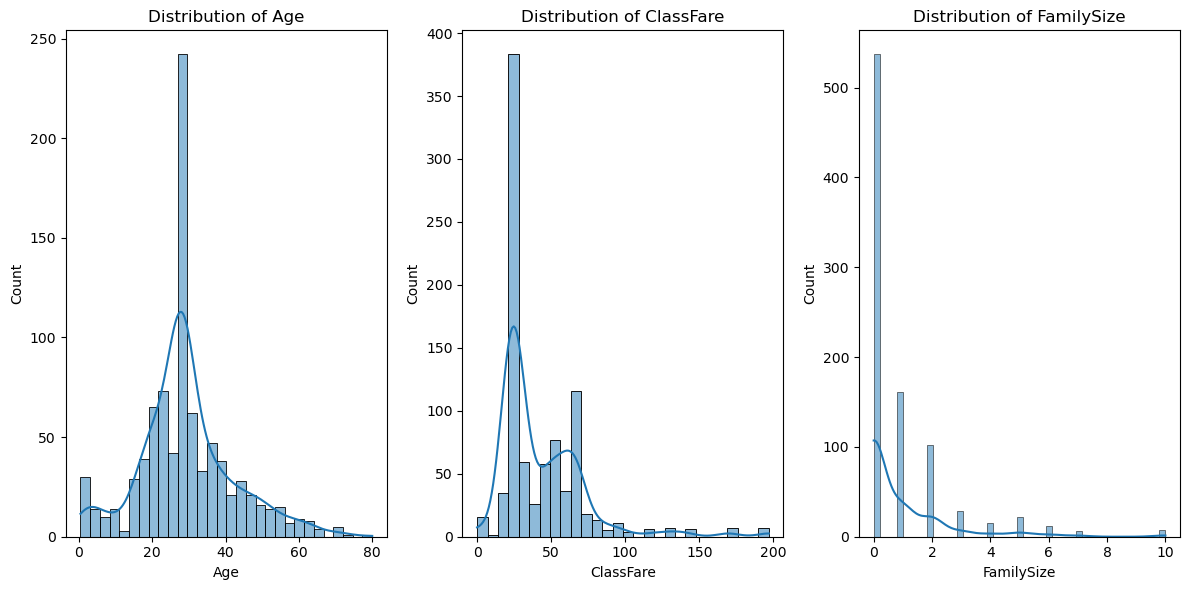

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(train_df['ClassFare'], kde=True)
plt.title('Distribution of ClassFare')

plt.subplot(1, 3, 3)
sns.histplot(train_df['FamilySize'], kde=True)
plt.title('Distribution of FamilySize')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
train_df[['Age', 'ClassFare', 'FamilySize']] = scaler.fit_transform(train_df[['Age', 'ClassFare', 'FamilySize']])

# Display the scaled numerical features
print(train_df[['Age', 'ClassFare', 'FamilySize']].head())


        Age  ClassFare  FamilySize
0 -0.565736  -0.724708    0.059160
1  0.663861   0.752434    0.059160
2 -0.258337  -0.656547   -0.560975
3  0.433312   0.330528    0.059160
4  0.433312  -0.643925   -0.560975


In [27]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = train_df[['Sex', 'Age', 'Embarked', 'ClassFare', 'FamilySize']]
y = train_df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Testing set: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Training set: X_train.shape = (712, 5), y_train.shape = (712,)
Testing set: X_test.shape = (179, 5), y_test.shape = (179,)


In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Print training completed message
print("Logistic Regression model training completed.")


Logistic Regression model training completed.


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Precision: 0.75
Recall: 0.70
F1-score: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[88 17]
 [22 52]]


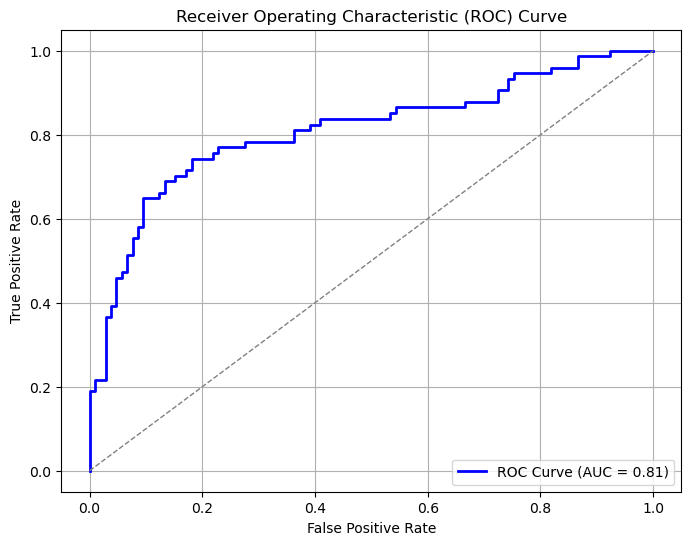

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for class 1 (survived)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [31]:
# Assuming 'logreg' is your trained logistic regression model
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logreg.coef_[0]})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

      Feature  Coefficient
3   ClassFare     0.360883
1         Age    -0.113079
2    Embarked    -0.334765
4  FamilySize    -0.539573
0         Sex    -2.567569


In [32]:
# Creating Sex_Age interaction term
X_train['Sex_Age'] = X_train['Sex'] * X_train['Age']
X_test['Sex_Age'] = X_test['Sex'] * X_test['Age']

# Optionally, create categorical age groups or fare categories
# Example:
# X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=[0, 18, 30, 50, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
# X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=[0, 18, 30, 50, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Senior'])


Accuracy: 0.79
Precision: 0.77
Recall: 0.72
AUC: 0.80


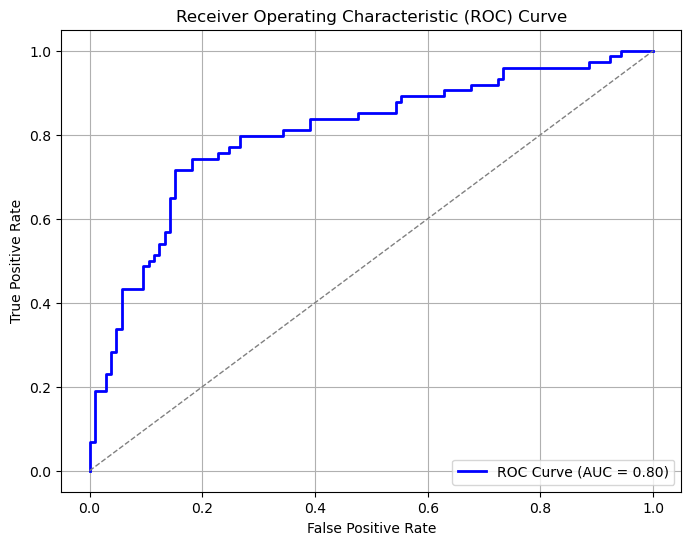

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

# Define a range of C values to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize logistic regression model
logreg = LogisticRegression(solver='liblinear')  # Specify solver

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Retrieve the best parameter and its score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C value: {best_C}")
print(f"Best ROC AUC score: {best_score:.3f}")

Best C value: 0.1
Best ROC AUC score: 0.815


In [35]:
# Define a range of solvers and penalty types to test
param_grid = {
    'solver': ['liblinear', 'lbfgs'],  # Include 'lbfgs' for larger datasets
    'penalty': ['l1', 'l2']
}

# Initialize logistic regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and their scores
best_solver = grid_search.best_params_['solver']
best_penalty = grid_search.best_params_['penalty']
best_score = grid_search.best_score_

print(f"Best solver: {best_solver}")
print(f"Best penalty: {best_penalty}")
print(f"Best ROC AUC score: {best_score:.3f}")


Best solver: lbfgs
Best penalty: l2
Best ROC AUC score: 0.814


C:\Users\Reshma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Reshma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reshma\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Reshma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model with best parameters
logreg_tuned = LogisticRegression(C=0.1, solver='liblinear', penalty='l2')

# Retrain the model on the training data with the tuned parameters
logreg_tuned.fit(X_train, y_train)

# Predict probabilities and labels for the test set
y_pred_proba_tuned = logreg_tuned.predict_proba(X_test)[:, 1]
y_pred_tuned = logreg_tuned.predict(X_test)


Tuned Logistic Regression Metrics:
Accuracy: 0.78
Precision: 0.76
Recall: 0.69
AUC: 0.80


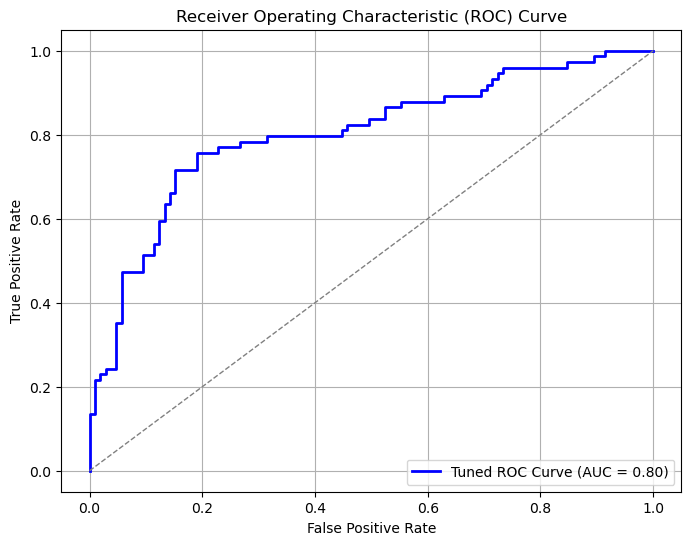

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate performance metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Tuned Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"AUC: {auc_tuned:.2f}")

# Plot ROC curve
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label=f'Tuned ROC Curve (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a range of parameters to test
param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Specify range of C values
}

# Initialize logistic regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and their scores
best_solver = grid_search.best_params_['solver']
best_penalty = grid_search.best_params_['penalty']
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best solver: {best_solver}")
print(f"Best penalty: {best_penalty}")
print(f"Best C value: {best_C}")
print(f"Best ROC AUC score: {best_score:.3f}")


Best solver: lbfgs
Best penalty: l2
Best C value: 0.1
Best ROC AUC score: 0.815


In [39]:
# Initialize logistic regression model with best parameters
logreg_tuned = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)

# Retrain the model on the training data with the tuned parameters
logreg_tuned.fit(X_train, y_train)

# Predict probabilities and labels for the test set
y_pred_proba_tuned = logreg_tuned.predict_proba(X_test)[:, 1]
y_pred_tuned = logreg_tuned.predict(X_test)

# Calculate performance metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Tuned Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"AUC: {auc_tuned:.2f}")


Tuned Logistic Regression Metrics:
Accuracy: 0.78
Precision: 0.76
Recall: 0.69
AUC: 0.81


In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize logistic regression model with tuned parameters
logreg_tuned = LogisticRegression(C=0.1, solver='lbfgs', penalty='l2')

# Initialize other classifiers for comparison
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Perform k-fold cross-validation (e.g., with k=5)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate logistic regression
logreg_scores = cross_val_score(logreg_tuned, X_train, y_train, cv=k_fold, scoring='roc_auc')
print(f"Logistic Regression Mean ROC AUC: {logreg_scores.mean():.3f}")

# Evaluate Random Forest
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=k_fold, scoring='roc_auc')
print(f"Random Forest Mean ROC AUC: {rf_scores.mean():.3f}")

# Evaluate Gradient Boosting
gb_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=k_fold, scoring='roc_auc')
print(f"Gradient Boosting Mean ROC AUC: {gb_scores.mean():.3f}")


Logistic Regression Mean ROC AUC: 0.814
Random Forest Mean ROC AUC: 0.833
Gradient Boosting Mean ROC AUC: 0.849


In [41]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.pipeline import Pipeline
import joblib
# Define and train the model
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=0.1, solver='lbfgs', penalty='l2'))
])

final_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.1))])

In [50]:
# Define and train the model
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=0.1, solver='lbfgs', penalty='l2'))
])

final_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(final_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [51]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load your trained logistic regression model
final_model = joblib.load('logistic_regression_model.pkl')

# Function to preprocess input data before prediction
def preprocess_input(data):
    # Add preprocessing steps as per your model training
    # Ensure input data matches the format expected by your model
    return data

# Streamlit app
def main():
    st.title('Titanic Survival Prediction')
    st.markdown('Enter passenger details to predict survival probability.')

    # Input fields for user to enter data
    age = st.number_input('Age', min_value=0, max_value=100, value=30)
    sex = st.selectbox('Sex', ['male', 'female'])
    embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
    class_fare = st.number_input('ClassFare', min_value=0.0, max_value=1000.0, value=50.0)
    family_size = st.number_input('FamilySize', min_value=0, max_value=10, value=2)

    # Convert categorical input to numerical if needed
    sex_encoded = 0 if sex == 'male' else 1
    embarked_encoded = {'C': 0, 'Q': 1, 'S': 2}[embarked]

    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'Sex': [sex_encoded],
        'Embarked': [embarked_encoded],
        'ClassFare': [class_fare],
        'FamilySize': [family_size]
    })

    # Preprocess input data
    input_data = preprocess_input(input_data)

    # Predict survival probability
    if st.button('Predict'):
        prediction = final_model.predict_proba(input_data)
        st.write(f"Survival Probability: {prediction[0][1]:.2f}")

if __name__ == '__main__':
    main()


2024-06-30 14:07:16.172 
  command:

    streamlit run C:\Users\Reshma\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [44]:
'''import streamlit as st
import pandas as pd
import numpy as np
import joblib  # For saving and loading models

# Load your trained logistic regression model
final_model = joblib.load('path_to_your_trained_model.pkl')  # Replace with your model path

# Function to preprocess input data before prediction
def preprocess_input(data):
    # Add preprocessing steps as per your model training
    # Ensure input data matches the format expected by your model
    return data

# Streamlit app
def main():
    st.title('Titanic Survival Prediction')
    st.markdown('Enter passenger details to predict survival probability.')

    # Input fields for user to enter data
    age = st.number_input('Age', min_value=0, max_value=100, value=30)
    sex = st.selectbox('Sex', ['male', 'female'])
    embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
    class_fare = st.number_input('ClassFare', min_value=0.0, max_value=1000.0, value=50.0)
    family_size = st.number_input('FamilySize', min_value=0, max_value=10, value=2)

    # Convert categorical input to numerical if needed
    sex_encoded = 0 if sex == 'male' else 1
    embarked_encoded = {'C': 0, 'Q': 1, 'S': 2}[embarked]

    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'Sex': [sex_encoded],
        'Embarked': [embarked_encoded],
        'ClassFare': [class_fare],
        'FamilySize': [family_size]
    })

    # Preprocess input data
    input_data = preprocess_input(input_data)

    # Predict survival probability
    if st.button('Predict'):
        prediction = final_model.predict_proba(input_data)
        st.write(f"Survival Probability: {prediction[0][1]:.2f}")

if __name__ == '__main__':
    main()
'''

'import streamlit as st\nimport pandas as pd\nimport numpy as np\nimport joblib  # For saving and loading models\n\n# Load your trained logistic regression model\nfinal_model = joblib.load(\'path_to_your_trained_model.pkl\')  # Replace with your model path\n\n# Function to preprocess input data before prediction\ndef preprocess_input(data):\n    # Add preprocessing steps as per your model training\n    # Ensure input data matches the format expected by your model\n    return data\n\n# Streamlit app\ndef main():\n    st.title(\'Titanic Survival Prediction\')\n    st.markdown(\'Enter passenger details to predict survival probability.\')\n\n    # Input fields for user to enter data\n    age = st.number_input(\'Age\', min_value=0, max_value=100, value=30)\n    sex = st.selectbox(\'Sex\', [\'male\', \'female\'])\n    embarked = st.selectbox(\'Embarked\', [\'C\', \'Q\', \'S\'])\n    class_fare = st.number_input(\'ClassFare\', min_value=0.0, max_value=1000.0, value=50.0)\n    family_size = st

In [ ]:
'''streamlit run app.py
'''

In [ ]:
'''### 1. What is the Difference Between Precision and Recall?

**Precision:**
   - **Definition:** Precision is the ratio of correctly predicted positive observations to the total predicted positives.
   - **Formula:**
     Precision = True Positives (TP)\True Positives (TP) + False Positives (FP)
     
   - **Interpretation:** Precision answers the question: Of all the instances that were predicted as positive, how many were actually positive? High precision indicates a low number of false positives.

**Recall:**
   - **Definition:** Recall, also known as Sensitivity or True Positive Rate, is the ratio of correctly predicted positive observations to all observations in the actual class.
   - **Formula:**
     Recall = True Positives (TP)\True Positives (TP) + False Negatives (FN)
     
   - **Interpretation:** Recall answers the question: Of all the instances that are actually positive, how many were correctly identified as positive? High recall indicates a low number of false negatives.

**Key Difference:**
   - **Precision** focuses on the accuracy of the positive predictions.
   - **Recall** focuses on the ability of the model to find all the relevant positive cases.

### 2. What is Cross-Validation, and Why is It Important in Binary Classification?

**Cross-Validation:**
   - **Definition:** Cross-validation is a resampling technique used to evaluate machine learning models on a limited data sample. It involves partitioning the dataset into a set of training and validation sets to assess how the model will generalize to an independent dataset.
   - **Common Methods:**
     - **K-Fold Cross-Validation:** The dataset is randomly partitioned into k equal-sized subsets. For each subset, the model is trained on k-1 subsets and validated on the remaining subset. This process is repeated k times, and the results are averaged to produce a single estimation.
     - **Stratified K-Fold:** Ensures that each fold of the dataset has the same proportion of classes as the original dataset, which is particularly important for imbalanced datasets.

**Importance in Binary Classification:**
   - **Model Validation:** Cross-validation provides a more reliable estimate of model performance compared to a simple train-test split. It ensures that every observation in the dataset has the chance of appearing in the training and validation set.
   - **Bias-Variance Trade-off:** Helps in understanding how the model performs on different subsets of the data, providing insights into the bias-variance trade-off.
   - **Hyperparameter Tuning:** Enables robust hyperparameter tuning by providing a consistent way to evaluate model performance across different parameter settings.
   - **Preventing Overfitting:** By using multiple training and validation sets, cross-validation helps in identifying overfitting, ensuring that the model generalizes well to unseen data.

### Strategies to Improve Logistic Regression Model

1. **Feature Engineering:**
   - **Polynomial Features:** Create polynomial combinations of features to capture non-linear relationships.
   - **Interaction Features:** Include interaction terms to capture relationships between features.

2. **Feature Selection:**
   - **Regularization:** Use L1 (Lasso) or L2 (Ridge) regularization to penalize large coefficients and reduce overfitting.
   - **Recursive Feature Elimination (RFE):** Iteratively select features based on their importance.

3. **Data Preprocessing:**
   - **Scaling:** Standardize or normalize features to ensure all features contribute equally to the model.
   - **Imputation:** Handle missing data appropriately to prevent data leakage and bias.

4. **Model Evaluation:**
   - **Confusion Matrix:** Analyze the confusion matrix to understand the distribution of predictions.
   - **ROC-AUC:** Use the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) metric for evaluating model performance.

5. **Hyperparameter Tuning:**
   - **Grid Search:** Systematically search through a predefined set of hyperparameters to find the best combination.
   - **Random Search:** Randomly search through the hyperparameter space to find an optimal set.

6. **Balancing Classes:**
   - **Resampling Techniques:** Use oversampling (e.g., SMOTE) or undersampling to balance the class distribution in the training set.
   - **Class Weights:** Assign higher weights to the minority class in the logistic regression algorithm.

7. **Model Ensembles:**
   - **Bagging:** Combine predictions from multiple logistic regression models to reduce variance.
   - **Boosting:** Use algorithms like AdaBoost or Gradient Boosting to improve model performance by focusing on hard-to-predict instances.

Implementing these strategies iteratively can help refine and enhance the performance of your logistic regression model, ensuring it performs well on unseen data.'''